## 1. Load The Tweets Dataset

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth",200)

In [2]:
data = pd.read_csv("tweets (1).csv")
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [3]:
# 0 refers to positive sentiment , 1 refers to negative sentiment

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [5]:
# Checking missing values
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
# Drop the id column
data.drop(["id"],axis=1,inplace=True)
data.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [7]:
# Check for the class balance
data["label"].value_counts(normalize=True)

0    0.744192
1    0.255808
Name: label, dtype: float64

<AxesSubplot:>

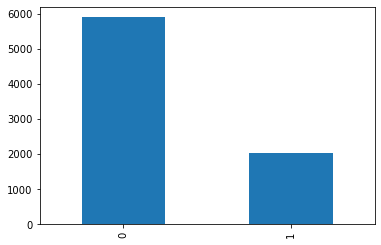

In [8]:
# plot the label counts
data["label"].value_counts().plot(kind="bar")

## 2. Data Cleaning

In [9]:
data["tweet"][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [10]:
import re

In [11]:
# substutute 's with "is"
re.sub(r"'s\b"," is",data["tweet"][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [12]:
# Removing the user mentions
data["tweet"][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [13]:
# We'll retain on the alphabets & digits
re.sub("@[A-Za_z0-9]+","",data["tweet"][11])

'Ha! Not heavy machinery but it does what I need it to. pple really dropped the ball with that design. #drinkyourhaterade'

In [14]:
# Remove the hastags
data["tweet"][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [15]:
re.sub("#","",data["tweet"][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [16]:
# Removing the hyperlinks
re.sub(r"http\S+","",data["tweet"][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [17]:
# Retain on the alphabets (get rid of punctuations, special char , digits)
data["tweet"][25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [18]:
re.sub(r"[^a-zA-Z]"," ",data["tweet"][0])

' fingerprint  Pregnancy Test https   goo gl h MfQV  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone'

In [19]:
# Stop words Removal
import nltk
from nltk.corpus import stopwords

In [20]:
nltk.download('stopwords')

nltk_stopwords = set(nltk.corpus.stopwords.words('english'))

print(nltk_stopwords)


{'wouldn', "shouldn't", "mightn't", 'while', 'after', 'a', 'nor', 'him', 'there', 'only', 'ma', "weren't", 'ours', 'than', 'then', 'at', 'are', 'so', 'now', "didn't", 'before', 'wasn', 'hers', 'her', 'which', 're', 'having', 'during', 'out', 'as', 'shouldn', 'when', "wouldn't", "you've", "couldn't", 'itself', "you'd", 'about', 'above', 's', 'until', 'very', 'don', 'does', 'over', 'both', 'been', 'shan', "mustn't", 'because', "it's", 'up', 'an', 'some', 'same', 'himself', 'further', 'won', 'had', 'and', 'i', "doesn't", 'that', 'too', 'but', 'more', 'down', 'the', 'why', "isn't", 'we', 'mightn', 'no', 'haven', 'yourself', "won't", 'be', "shan't", 'those', "aren't", 'of', 'through', 'aren', 'below', 'on', 'isn', 'our', 'theirs', 'she', 'doing', 'hasn', 'here', 'did', 'any', 'herself', 'is', 'were', 'just', "needn't", 'weren', 'or', 'other', "don't", 'doesn', 'yourselves', 'in', "you're", 'all', 'who', "hasn't", "haven't", "hadn't", 'myself', 'm', 'their', "you'll", 'how', 'will', 'am', 't

[nltk_data] Downloading package stopwords to C:\Users\Rakesh
[nltk_data]     Rout\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
len(nltk_stopwords)

179

In [22]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'twenty', 'one', 'could', 'whether', 'go', 'three', 'while', 'nobody', 'after', 'nor', 'describe', 'etc', 'him', 'get', 'there', 'only', 'ours', 'than', 'so', 'then', 'are', 'thence', 'per', 'before', 'hers', 'her', 'amount', 'somewhere', 'co', 'found', 'bill', 'thereby', 'itself', 'throughout', 'either', 'sometime', 'seems', 'about', 'still', 'until', 'very', 'both', 'made', 'thru', 'up', 'some', 'never', 'same', 'thin', 'and', 'mine', 'whereby', 'that', 'too', 'hereafter', 'but', 'the', 'top', 'become', 'whoever', 'nowhere', 'amoungst', 'we', 'no', 'sixty', 'although', 'much', 'within', 'whither', 'something', 'even', 'first', 'on', 'whereafter', 'whereas', 'becoming', 'she', 'whenever', 'two', 'whereupon', 'perhaps', 'wherever', 'detail', 'around', 'indeed', 'ltd', 'is', 'someone', 'hence', 'nevertheless', 'or', 'others', 'amongst', 'call', 'somehow', 'cannot', 'five', 'nine', 'yourselves', 'though', 'back', 'whose', 'system', 'who', 'cant', 'myself', 'will', 'how', 'their', 'am', 

In [23]:
len(sklearn_stopwords)

318

In [24]:
# Find the common stopwords from NLTK and sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'while', 'after', 'a', 'nor', 'him', 'there', 'only', 'ours', 'than', 'then', 'at', 'are', 'so', 'now', 'before', 'hers', 'her', 'which', 're', 'during', 'out', 'as', 'when', 'itself', 'above', 'about', 'until', 'very', 'over', 'both', 'been', 'because', 'up', 'an', 'some', 'same', 'himself', 'further', 'had', 'and', 'i', 'that', 'too', 'but', 'more', 'down', 'the', 'why', 'we', 'no', 'yourself', 'be', 'those', 'of', 'through', 'below', 'on', 'our', 'she', 'here', 'any', 'herself', 'is', 'were', 'or', 'other', 'yourselves', 'in', 'all', 'who', 'myself', 'their', 'how', 'will', 'am', 'them', 'to', 'again', 'between', 'into', 'if', 'have', 'these', 'once', 'each', 'what', 'by', 'your', 'you', 'he', 'do', 'has', 'being', 'whom', 'themselves', 'most', 'not', 'can', 'this', 'it', 'for', 'from', 'under', 'yours', 'should', 'against', 'they', 'where', 'with', 'me', 'was', 'its', 'such', 'ourselves', 'his', 'off', 'my', 'few', 'own'}


In [25]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [26]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [27]:
len(combined_stopwords)

378

In [28]:
# Text Normalization: steming or Lemmatization(prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [29]:
data["tweet"][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [30]:
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
new_sent = ""
for token in data["tweet"][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + " "
print(new_sent)

[nltk_data] Downloading package wordnet to C:\Users\Rakesh
[nltk_data]     Rout\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si 


In [31]:
!pip install contractions
import contractions
data["tweet"][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [32]:
contractions.fix(data["tweet"][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

## Define the Cleaner Function & Apply

In [33]:
import re

In [34]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    cleaned_text = ""
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token)+ " "
    
    return cleaned_text
    

In [35]:
cleaned_tweets = [] # list for cleande tweets
for twt in data["tweet"]:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

In [36]:
cleaned_tweets[:5]

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias ',
 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect ',
 'i am wired i know i am george i wa made that way iphone cute daventry home ',
 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support ']

In [37]:
data["tweet"][1500].split()

['#Apple',
 'Bunch',
 'if',
 'Crooks',
 'Refused',
 'to',
 'repair/replace',
 'my',
 'beats',
 'wireless.',
 'Problem',
 'rubber',
 'on',
 'mic',
 'coming',
 'off',
 'microphones',
 'stopped',
 'working.',
 'Said',
 'warranty',
 'was',
 'void',
 'because',
 'ear',
 'piece',
 'looked',
 'chewed.',
 'Bullshit.',
 'I',
 'don’t',
 'have',
 'any',
 'animals',
 'and',
 'I',
 'would',
 'chew',
 'on',
 'anything',
 'I',
 'put',
 'in',
 'my',
 'ear.',
 'pic.twitter.com/GfgvquEpuC']

In [38]:
cleaned_tweets[1500]

'apple bunch if crook refused to repair replace my beat wireless problem rubber on mic coming off microphone stopped working said warranty wa void because ear piece looked chewed bullshit i do not have any animal and i would chew on anything i put in my ear pic twitter com gfgvquepuc '

In [39]:
# tweer["tweet"].apply(lambda x: tweet_cleaner(x))

In [40]:
data["cleaned_tweets_w/o_SW"] = cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support


## #. Data Visualization

In [41]:
# collecting all the words from all the tweets into a single list
all_words= []
for t in data["tweet"]:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words))

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm"]


34348

In [42]:
import matplotlib.pyplot as plt

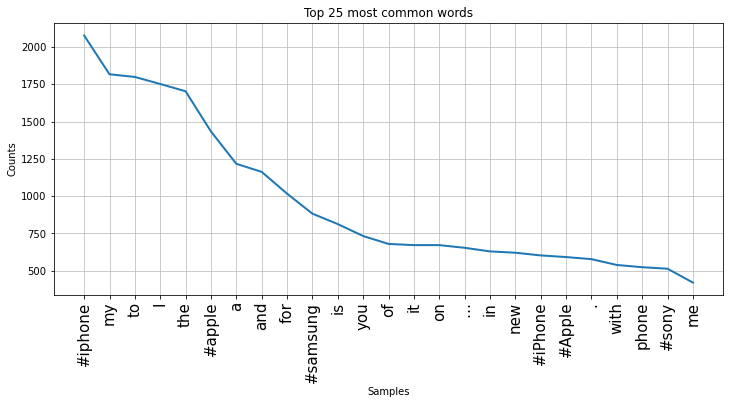

In [43]:
# Frequency distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title("Top 25 most common words")
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

## Plot for Cleaned Tweets

In [44]:
# Plotting cleande Tweets
all_words = []
for t in data['cleaned_tweets_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'a', 'transparant', 'silicon', 'case', 'thanks', 'to', 'my', 'uncle', 'yay', 'sony', 'xperia', 's', 'sonyexperias', 'we', 'love', 'this', 'would', 'you', 'go', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'i', 'am', 'wired', 'i', 'know', 'i', 'am', 'george', 'i', 'wa']


In [45]:
len(set(all_words))

15981

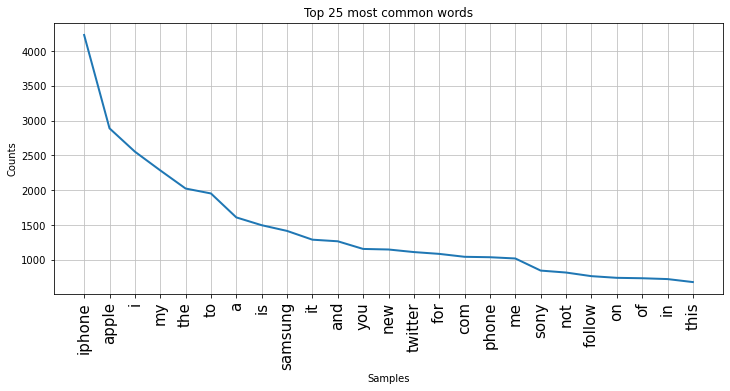

In [46]:
# Frequency distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title("Top 25 most common words")
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)
plt.show()

## DV After applying Stop words

In [47]:
type(combined_stopwords)

set

In [48]:
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    new_text = [token for token in new_text.split() if token not in combined_stopwords]
    
    new_text = [token for token in new_text if len(token)>2]
    
    cleaned_text = ""
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + " "
    
    return cleaned_text

In [49]:
cleaned_tweets = list(data["tweet"].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ', 'love talk makememories unplug relax iphone smartphone wifi connect ', 'wired know george way iphone cute daventry home ', 'amazing service apple talk question unless pay stupid support ', 'iphone software update fucked phone big time stupid iphones ', 'happy instapic instadaily sony xperia xperiaz ', 'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc ', 'bout shopping listening music iphone justme music likeforlike followforfollow ', 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ']


In [50]:
data.columns

Index(['label', 'tweet', 'cleaned_tweets_w/o_SW'], dtype='object')

In [51]:
data["cleaned_tweets_with_SW"] = cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software']


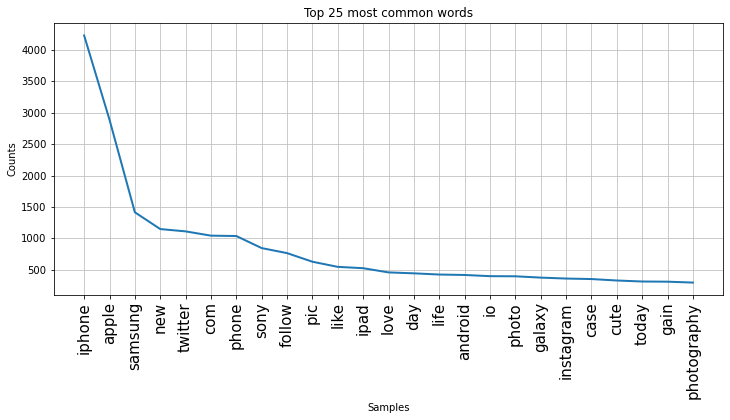

In [52]:
all_words = []
for t in data['cleaned_tweets_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [53]:
domain_stopwords = ["phone","mobile","twitter","rt","com","follow"]
final_stopwords = domain_stopwords + list(combined_stopwords)

In [54]:
# HW: re-do the cleaner function to include final_stopwords
# and re-plot and see what more come up!

In [55]:
data.head()

,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


## 4. Bag of Words Model (Feature Extraction)

In [56]:
data.shape

(7920, 4)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(data["cleaned_tweets_w/o_SW"])

In [58]:
CV_features.shape

(7920, 15955)

In [59]:
CV_features[0]

<1x15955 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [60]:
type(CV_features[0])  # each row is a compressed spare row 

scipy.sparse.csr.csr_matrix

In [61]:
CV_features[0].todense()  # decompressing the CSR data

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [62]:
df = pd.DataFrame(CV_features.todense())
df

,0,1,2,3,4,5,6,7,8,9,...,15945,15946,15947,15948,15949,15950,15951,15952,15953,15954
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df.size/1e6 # these many elements/numbers are presnt in the df

126.3636

In [64]:
np.count_nonzero(df)

114973

In [65]:
100*np.count_nonzero(df)/df.size  # percent of the non-zero elements i nthe df

0.09098585352110893

In [66]:
print(CV.get_feature_names()[:50])  # these the vocab words

['aa', 'aaaahhhhhhh', 'aag', 'aah', 'aalborg', 'aand', 'aapl', 'aarhus', 'aaron', 'aarp', 'aarrrggghhhh', 'aashamsakal', 'aaydojbfkq', 'aayp', 'ab', 'abah', 'abareta', 'abay', 'abb', 'abc', 'abdou', 'abe', 'aber', 'abercrombie', 'abi', 'ability', 'abit', 'able', 'ableton', 'abnqum', 'aboard', 'about', 'aboutalook', 'aboutdamntime', 'abouttime', 'abouttonight', 'above', 'abp', 'abscbn', 'absence', 'absolute', 'absolutely', 'absurd', 'abu', 'abudhabi', 'abuja', 'abujacity', 'abujafct', 'abujapeople', 'abujaphones']


C:\Users\Rakesh Rout\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [67]:
# len(CV.get_feature_names_out())
len(CV.get_feature_names())

15955

In [68]:
CV_features[10].todense()  # these are numbers corresponding to the 11th tweet

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
CV.inverse_transform(np.asarray(CV_features[10].todense()))  # actual words in the 10th tweet

[array(['apple', 'color', 'crash', 'do', 'every', 'five', 'fuckin', 'hey',
        'inch', 'ipod', 'it', 'make', 'minite', 'new', 'not', 'or',
        'thinner', 'when', 'you'], dtype='<U41')]

## 5. Model Building

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(CV_features, data["label"],test_size=0.25, stratify=data['label'], random_state=42)

In [71]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver="liblinear")
LR.fit(X_train,y_train)

print(LR.score(X_train, y_train)) # Train score
print(LR.score(X_test, y_test))  # Test Score

0.9779461279461279
0.8813131313131313


In [72]:
## L1-Regularization
LR1 = LogisticRegression(class_weight="balanced",solver="liblinear", penalty="l1", C = 0.3)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))
print(LR1.score(X_test, y_test))

0.8971380471380471
0.8803030303030303


In [73]:
## Let's Cross_validate the Logistic Regression Model ????
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [74]:
X = CV_features
y = data["label"]

In [76]:
## Cross Validate The LR1 model

LR1 = LogisticRegression(class_weight = "balanced", solver="liblinear", penalty="l1", C= 0.3)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring="accuracy")
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100,2))

[0.88131313 0.86742424 0.87310606 0.89330808 0.88573232]
88.02 0.91


In [80]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR1, X, y, cv=kfold, scoring="accuracy", return_train_score=True)

In [81]:
results

{'fit_time': array([0.04400778, 0.03759289, 0.03603506, 0.03196502, 0.03052974]),
 'score_time': array([0.00102925, 0.00099897, 0.00099993, 0.00100064, 0.00100207]),
 'test_score': array([0.88131313, 0.86742424, 0.87310606, 0.89330808, 0.88573232]),
 'train_score': array([0.89662247, 0.9000947 , 0.89583333, 0.89330808, 0.89662247])}

In [83]:
print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

[0.89662247 0.9000947  0.89583333 0.89330808 0.89662247]
89.65 0.22


In [82]:
print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

[0.88131313 0.86742424 0.87310606 0.89330808 0.88573232]
88.02 0.91


## Hyper Parameter Tuning of LR1 Model

In [84]:
## Hyper parameter tuning of the LR1 model
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [85]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [86]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 0.95001}, 0.8905303030303029, 19)

In [87]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [88]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

89.05303030303028

In [89]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100

# means your "best-fitted" model from GridsearchCV is (could be) still OVERFITTED!!!!!!!!!

93.27967171717171

In [90]:
grid_results.cv_results_['std_test_score'][grid_results.best_index_]*100

0.6320702530698907

In [91]:
grid_results.cv_results_['mean_test_score']

array([0.74419192, 0.84494949, 0.86338384, 0.87171717, 0.87537879,
       0.8790404 , 0.88017677, 0.88143939, 0.88282828, 0.88497475,
       0.88560606, 0.88661616, 0.88699495, 0.88876263, 0.88939394,
       0.88901515, 0.88939394, 0.88939394, 0.88989899, 0.8905303 ])

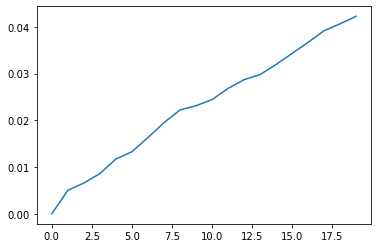

In [92]:
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])

In [93]:
grid_results.param_grid


{'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
        2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
        5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
        7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])}

In [94]:
grid_results.param_grid['C'][3]

0.15001000000000003

In [95]:
grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score']

array([-1.11022302e-16,  5.05050505e-03,  6.59722222e-03,  8.61742424e-03,
        1.17424242e-02,  1.32891414e-02,  1.63194444e-02,  1.95075758e-02,
        2.22222222e-02,  2.31376263e-02,  2.44318182e-02,  2.68308081e-02,
        2.86931818e-02,  2.97979798e-02,  3.19444444e-02,  3.43118687e-02,
        3.66792929e-02,  3.91729798e-02,  4.06565657e-02,  4.22664141e-02])

In [96]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

88.28 0.93


In [97]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [98]:
CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [99]:
len(CV_pipe['CV'].vocabulary_)  # CV with stopwords applied already & word_len > 2

15955

In [100]:
# print(CV_pipe['CV'].vocabulary_)

## 6. LR Model w/o vs with stop_words ??

In [101]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

86.87 1.07


15673

In [102]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=None)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

86.77 1.03


1086

In [103]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=300)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

85.24 1.3


300